<a href="https://colab.research.google.com/github/ajaimes448/Ciencia_de_Datos/blob/main/Clase_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install statsmodels

In [9]:
!pip install wquantiles

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import statsmodels.api as sm
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Cargar un archivo desde el computador(sistema)
#https://raw.githubusercontent.com/adiacla/bigdata/master/bank.csv
prestamo=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DATASET]/prestamo (1).csv",sep=";")

In [12]:
prestamo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [13]:
type(prestamo)

pandas.core.frame.DataFrame

In [14]:
print(prestamo)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

#Operaciones con DataFrame

In [15]:
#Numero de Filas
len(prestamo)

4521

In [16]:
#Tamaño de el DataFrame
prestamo.shape

(4521, 17)

In [17]:
#Total de datos
prestamo.size

76857

In [18]:
#Sacar solo una muestra aleatoria
#n significa el numero de datos que quiere que saque
prestamo.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
162,41,admin.,single,secondary,no,-256,no,yes,unknown,9,may,35,3,-1,0,unknown,no
559,47,technician,divorced,secondary,no,2914,yes,no,cellular,18,aug,405,13,-1,0,unknown,no
2104,38,self-employed,divorced,tertiary,no,1513,no,no,cellular,7,may,330,1,342,1,failure,no
3307,28,student,single,secondary,no,0,yes,no,unknown,15,may,133,3,-1,0,unknown,no
2639,50,management,married,tertiary,no,1240,no,no,cellular,12,aug,474,2,-1,0,unknown,no


In [19]:
#Porcentaje que queire sacar del DataFrame
aleatorio=prestamo.sample(frac=0.01)

In [20]:
#Tamaño de el DataFrame de la muestra del porcentaje
aleatorio.shape

(45, 17)

In [21]:
#Para extraer los primeros 5 registros
df5=prestamo.head(5)

In [22]:
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
#Para extraer los ultimos 5 registros
prestamo.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [24]:
#Sacar los datos de una sola columna
df_saldos=prestamo.balance

In [25]:
df_saldos

,balance
0,1787
1,4789
2,1350
3,1476
4,0
...,...
4516,-333
4517,-3313
4518,295
4519,1137


In [26]:
#Del DataFrame, saber que tipo de variables tiene prestamo
#int=enteros
#object=caracter
prestamo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [27]:
#Promedio de las edades
prestamo.age.mean()

np.float64(41.17009511170095)

In [28]:
#edad del cliente mas joven
prestamo.age.min()

19

In [29]:
#edad cliente mas viejo
prestamo.age.max()

87

In [30]:
#Cual es la varianza
Varianza=prestamo.age.var()

In [31]:
Varianza

111.85623824316447

In [32]:
#Cual es la desviacion
Desviacion= prestamo.age.std()

In [33]:
Desviacion

10.576210958711275

In [34]:
#Sacar la mediana de la edad de lso clientes en prestamos
prestamo.age.median()

39.0

In [35]:
#Sacar todo lo anterior en un solo comando
prestamo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [43]:
subcolumnas=prestamo[["age", "balance", "default"]]

In [40]:
type(subcolumnas)

pandas.core.frame.DataFrame

In [41]:
subcolumnas

,age,balance,default
0,30,1787,no
1,33,4789,no
2,35,1350,no
3,30,1476,no
4,59,0,no
...,...,...,...
4516,33,-333,no
4517,57,-3313,yes
4518,57,295,no
4519,28,1137,no


In [44]:
#Informacion de los datos que se sacan
prestamo.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [45]:
#Mostrar en pantalla los clientes que son mayores de 70 años
prestamo.query("age > 70")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
166,78,housemaid,married,secondary,no,499,no,no,telephone,16,mar,80,4,-1,0,unknown,no
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
412,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes
573,81,retired,married,secondary,no,1,no,no,cellular,19,aug,65,5,-1,0,unknown,no
633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no
688,80,management,married,primary,no,6483,no,no,telephone,19,oct,123,1,-1,0,unknown,no
1126,77,retired,married,secondary,no,610,no,no,cellular,13,aug,766,3,-1,0,unknown,no


In [46]:
#Personas mayores de 70 y que estan divorciadas
divorciados_mayores_setenta=prestamo.query('marital=="divorced"and age>70')

In [47]:
print(divorciados_mayores_setenta.age.count())

12


In [48]:
print(divorciados_mayores_setenta.age.mean())

77.5


In [49]:
#Inluir objetos en la informacion de los datos
prestamo.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


#Graficas con los metodos propios de Pandas(no con la libreria Matplotlib)

<Axes: xlabel='age', ylabel='balance'>

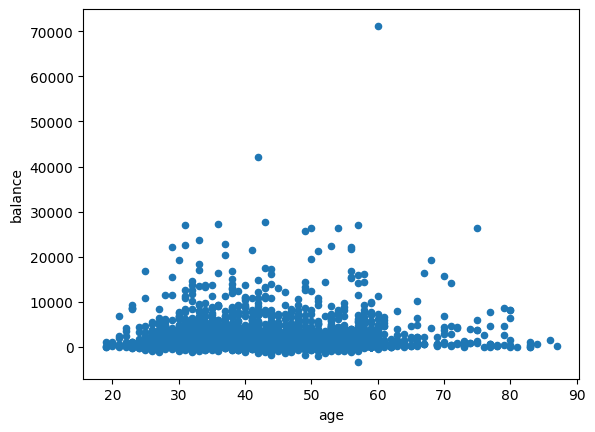

In [51]:
#Graficar, comparacion de edad y saldos
subcolumnas.plot.scatter("age","balance")

<Axes: xlabel='age', ylabel='balance'>

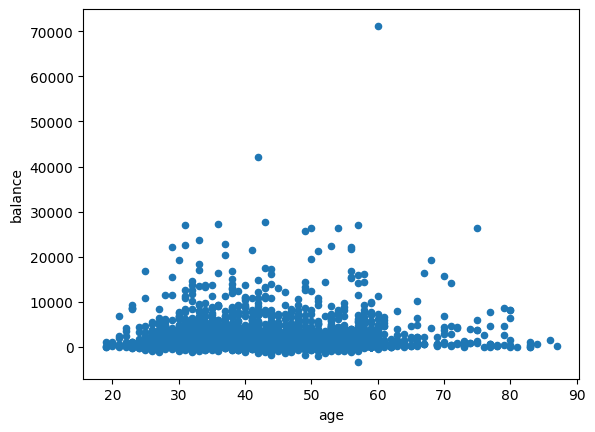

In [52]:
#Lo mismo que la anterior en forma diferente
subcolumnas.plot(kind="scatter",x="age", y="balance")

In [53]:
#Graficar los valores de prestamo
#Se demora mucho
prestamo.plot.bar()

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x799371a0a520> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x799371a08040> (for post_execute):


KeyboardInterrupt: 

In [54]:
subprestamo=prestamo[["age", "job", "marital", "default", "balance"]]

<Axes: >

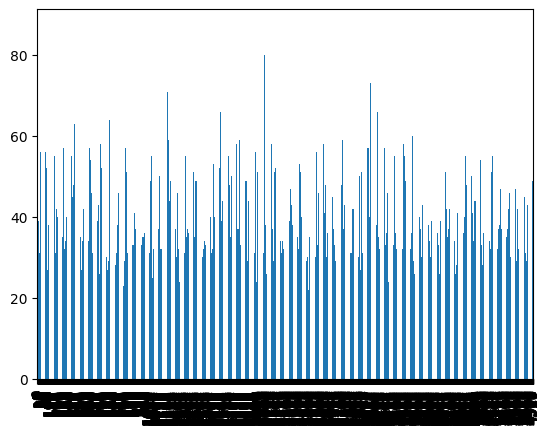

In [55]:
subprestamo.age.plot.bar()

#Nuevo DataFrame

In [56]:
#Cargar un archivo desde el computador(sistema)
df_universidad=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

In [57]:
df_universidad

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


<Axes: >

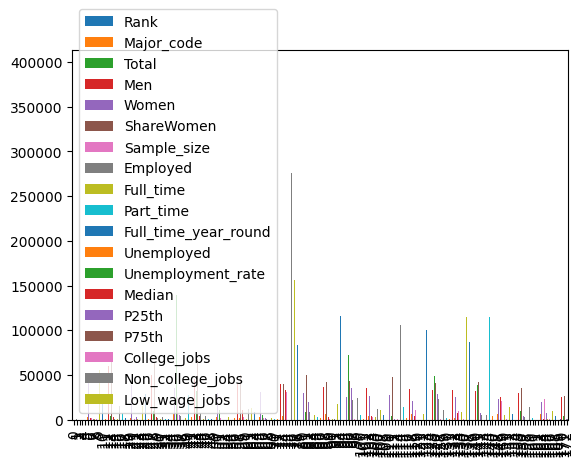

In [58]:
df_universidad.plot.bar()

In [59]:
df_universidad.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

<Axes: >

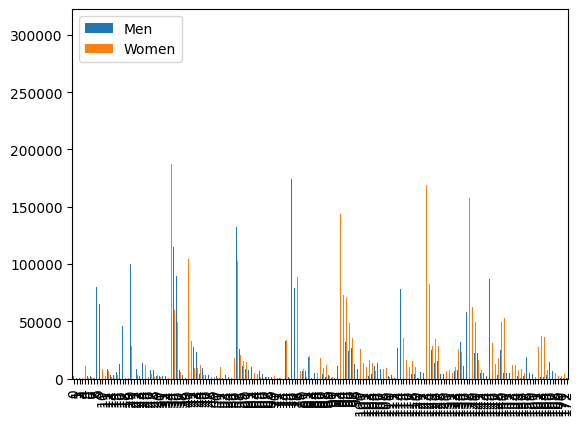

In [60]:
df_universidad[["Men","Women"]].plot.bar()

<Axes: xlabel='Rank'>

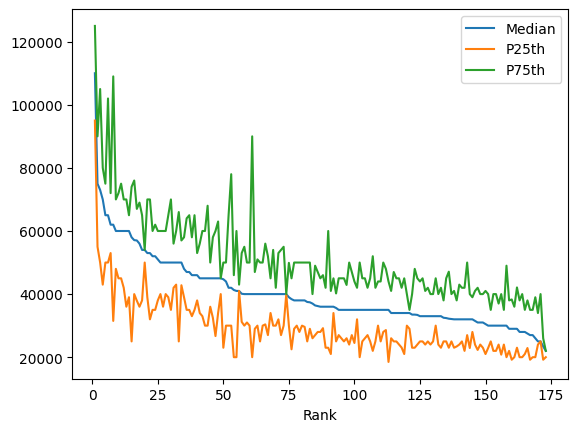

In [61]:
df_universidad.plot(x="Rank", y=["Median", "P25th", "P75th"])

#Repaso

In [62]:
#Features= Caracteristicas(Columnas)/df.nombre_de_la_caracteristica(solo si hay una sola palabra) o df["nombre_de_la_caracteristica"]
#Instancias= Filas
#DataSet conjunto de datos
#prestamo.columns #(Nombre de las columnas)
#prestamo.age, prestamo.marital
#prestamo["age"]
clientes=prestamo[["age","marital","default"]]

In [63]:
clientes

,age,marital,default
0,30,married,no
1,33,married,no
2,35,single,no
3,30,married,no
4,59,married,no
...,...,...,...
4516,33,married,no
4517,57,married,yes
4518,57,married,no
4519,28,married,no


In [64]:
#Datos numericos, sacar la info
prestamo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [65]:
#Datos no numericos, sacar la info
prestamo.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [66]:
#Cuales son los tipos de trabajo
prestamo.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [67]:
#Cuales son los tipos de estado civil
prestamo.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [68]:
#loc(referencias las columnas o los features y los numeros) e Iloc(solamente numeros)
prestamo.iloc[:,0] #toma la primera columna
prestamo.iloc[0] #para mostrar la primera fila[n]
prestamo.iloc[-1] #para mostrar el ultimo
prestamo.iloc[:,4] #mostrar columna 4
prestamo.iloc[:,-1] #mostrar la ultima columna
prestamo.iloc[:,[1,3,5]] #mostrar la columna 1,3,5
prestamo.iloc[1000:2001,[4,5]]#filas 1000 al 2000 con las columnas 4 y 5

,default,balance
1000,no,209
1001,no,438
1002,no,1242
1003,no,355
1004,no,204
...,...,...
1996,no,1573
1997,no,77
1998,no,1378
1999,no,-73


In [69]:
prestamo.loc[:,"balance"]
prestamo.loc[1000:2000,["job","balance","age"]]
clientes_estado_civil=prestamo.loc[10:21,["job","marital","default"]]

In [70]:
#cuales son casados?
clientes_estado_civil.query('marital=="married"').count()

,0
job,7
marital,7
default,7


In [71]:
#sacar los casados on loc
condicion=clientes_estado_civil.loc[:,"marital"]=="married"

In [72]:
clientes_estado_civil.loc[condicion].count()

,0
job,7
marital,7
default,7


In [73]:
#copia de datos
copi_prestamo=prestamo.copy()

In [74]:
copi_prestamo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [75]:
copi_prestamo.drop(['previous','poutcome','y'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211


In [76]:
copia_prestamo_new=copi_prestamo.drop(['previous','poutcome','y'],axis=1)

In [77]:
#borrar en la misma variable, pero no se puede recuperar despues
copi_prestamo.drop(['previous','poutcome','y'],axis=1,inplace=True)

In [78]:
copi_prestamo.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays'],
      dtype='object')

#Graficas por Matplotlib

In [80]:
#Siempre debe ir en la cabecera
import matplotlib.pyplot as plt

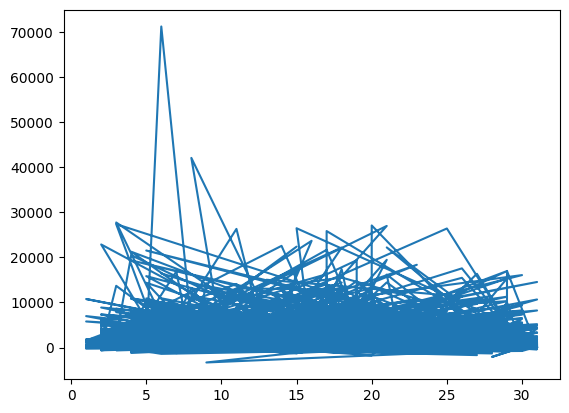

In [81]:
plt.plot(prestamo.day,prestamo.balance)

In [82]:
saldo_agrupado=prestamo.groupby("day")["balance"].mean()

In [83]:
saldo_agrupado

,balance
day,
1,1313.296296
2,1450.605263
3,1602.495238
4,1627.769784
5,1664.447514
6,1614.299465
7,638.642105
8,1365.833333
9,1143.214724


In [84]:
type(saldo_agrupado)

pandas.core.series.Series

In [85]:
df_saldos=pd.DataFrame(saldo_agrupado)

In [86]:
df_saldos

,balance
day,
1,1313.296296
2,1450.605263
3,1602.495238
4,1627.769784
5,1664.447514
6,1614.299465
7,638.642105
8,1365.833333
9,1143.214724


In [87]:
type(df_saldos)

pandas.core.frame.DataFrame

In [88]:
df_saldos["day"]=df_saldos.index

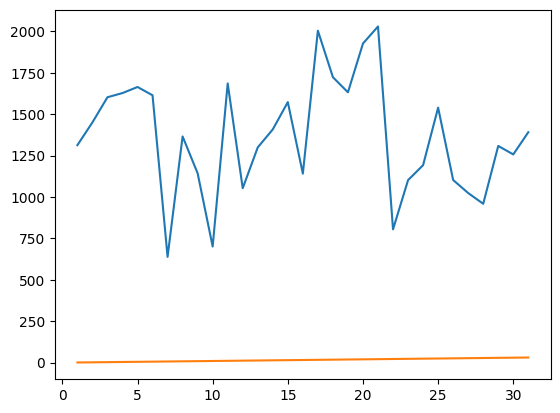

In [89]:
plt.plot(df_saldos)